# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [147]:
!pip install citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    #city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|port alfred
Processing record 2|lastoursville
Processing record 3|punta arenas
Processing record 4|hofn
Processing record 5|puerto ayora
Processing record 6|najran
Processing record 7|kahului
Processing record 8|new norfolk
Processing record 9|coahuayana
Processing record 10|salalah
Processing record 11|provideniya
Processing record 12|aklavik
Processing record 13|karaton
Processing record 14|faanui
City not found. skipping.
Processing record 15|vaini
Processing record 16|talnakh
Processing record 17|jamestown
Processing record 18|los llanos de aridane
Processing record 19|tasiilaq
Processing record 20|ushuaia
Processing record 21|veraval
Processing record 22|beira
Processing record 23|mataura
Processing record 24|camacha
Processing record 25|sorso
Processing record 26|longyearbyen
City not found. skipping.
Processing record 27|busselton
City not found. skipping.
Processing record 28|mizdah
Processing record 29|havre-saint-pierre
Processing record 30|chuy
Processing

Processing record 248|lorengau
Processing record 249|shache
Processing record 250|kalga
Processing record 251|pachino
City not found. skipping.
Processing record 252|fairbanks
Processing record 253|ugoofaaru
Processing record 254|harnosand
Processing record 255|nurota
Processing record 256|havelock
Processing record 257|ko samui
Processing record 258|meulaboh
Processing record 259|ponyri
Processing record 260|souillac
City not found. skipping.
Processing record 261|pisco
Processing record 262|gao
Processing record 263|cidreira
Processing record 264|polessk
Processing record 265|mount gambier
City not found. skipping.
Processing record 266|yumen
Processing record 267|teguldet
Processing record 268|dom pedrito
City not found. skipping.
Processing record 269|zuwarah
Processing record 270|okhotsk
Processing record 271|the valley
Processing record 272|tuatapere
Processing record 273|dingle
Processing record 274|ribeira grande
Processing record 275|poros
City not found. skipping.
Processing 

Processing record 493|nome
Processing record 494|margate
Processing record 495|limbang
Processing record 496|kaset sombun
Processing record 497|oudtshoorn
Processing record 498|riyadh
Processing record 499|awjilah
Processing record 500|male
Processing record 501|gillette
Processing record 502|suoyarvi
City not found. skipping.
Processing record 503|manbij
Processing record 504|san ramon
Processing record 505|half moon bay
Processing record 506|alanya
Processing record 507|constitucion
Processing record 508|ariquemes
Processing record 509|uruzgan
Processing record 510|portland
City not found. skipping.
Processing record 511|anadyr
Processing record 512|burns lake
Processing record 513|san quintin
Processing record 514|saint-pierre
Processing record 515|safranbolu
Processing record 516|gwalior
Processing record 517|sault sainte marie
Processing record 518|airai
Processing record 519|bria
Processing record 520|dubovskoye
Processing record 521|santiago del estero
Processing record 522|sran

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

#Creating city dataframe
cities_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
cities_df = cities_df.rename_axis('City ID')


#Displaying dataframe
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Port Alfred,35,ZA,1614750267,96,-33.5906,26.8910,293.15,2.24
1,Lastoursville,100,GA,1614750267,95,-0.8143,12.7287,296.35,0.41
2,Punta Arenas,0,CL,1614750130,81,-53.1500,-70.9167,280.15,3.09
3,Hofn,100,IS,1614750267,87,64.2539,-15.2082,274.77,7.64
4,Puerto Ayora,92,EC,1614750268,95,-0.7393,-90.3518,297.59,0.45
...,...,...,...,...,...,...,...,...,...
565,Tazovsky,100,RU,1614750371,91,67.4667,78.7000,252.64,10.46
566,Cabedelo,75,BR,1614750371,100,-6.9811,-34.8339,297.15,4.00
567,Angoche,99,MZ,1614750371,84,-16.2325,39.9086,299.14,4.09


In [7]:
#Exporting data to csv
cities_df.to_csv(r'cities_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity

[96,
 95,
 81,
 87,
 95,
 37,
 73,
 64,
 94,
 69,
 71,
 76,
 66,
 72,
 88,
 77,
 60,
 68,
 43,
 61,
 22,
 83,
 76,
 72,
 93,
 72,
 93,
 88,
 73,
 92,
 17,
 83,
 93,
 80,
 87,
 74,
 83,
 86,
 76,
 68,
 71,
 91,
 95,
 94,
 73,
 55,
 73,
 8,
 76,
 33,
 95,
 81,
 80,
 75,
 78,
 14,
 96,
 96,
 81,
 69,
 44,
 70,
 85,
 87,
 86,
 60,
 73,
 57,
 19,
 86,
 42,
 64,
 36,
 86,
 19,
 93,
 77,
 86,
 93,
 96,
 84,
 74,
 76,
 68,
 85,
 93,
 94,
 74,
 93,
 90,
 82,
 47,
 28,
 82,
 69,
 93,
 43,
 58,
 83,
 100,
 90,
 56,
 100,
 53,
 84,
 84,
 93,
 76,
 86,
 58,
 87,
 79,
 13,
 80,
 19,
 66,
 77,
 95,
 65,
 76,
 49,
 19,
 93,
 49,
 66,
 86,
 11,
 70,
 94,
 87,
 39,
 51,
 95,
 93,
 96,
 86,
 83,
 96,
 76,
 37,
 57,
 100,
 79,
 92,
 14,
 90,
 77,
 90,
 98,
 90,
 87,
 78,
 89,
 98,
 84,
 77,
 93,
 97,
 88,
 70,
 74,
 82,
 80,
 94,
 85,
 76,
 54,
 93,
 86,
 55,
 94,
 80,
 50,
 74,
 94,
 100,
 43,
 64,
 77,
 74,
 95,
 60,
 93,
 93,
 71,
 100,
 90,
 58,
 94,
 93,
 70,
 96,
 48,
 93,
 80,
 15,
 86,
 68,
 55,
 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

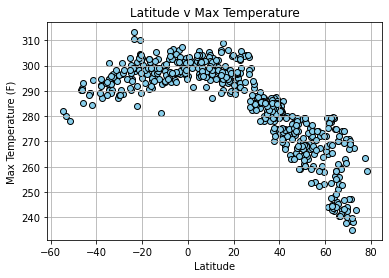

In [9]:
x_axis = cities_df['Lat']
y_axis = cities_df['Max Temp']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('Latitude v Max Temperature')
plt.grid()
plt.show()


######   This chart shows a strong correlation between latituted and temperature. As expected the closer you are to the equator the high the temperatures tend to be.


## Latitude vs. Humidity Plot

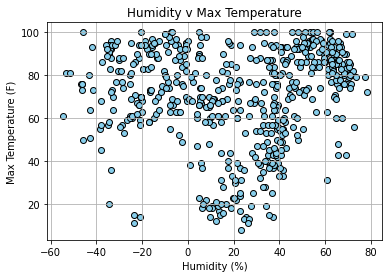

In [30]:
x_axis = cities_df['Lat']
y_axis = cities_df['Humidity']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Humidity (%)')
plt.title('Humidity v Max Temperature')
plt.grid()

plt.show()


###### From the plot we can see that there is not a strong correlation between humidity and latitude. There is are a varity of points at every level of humidity while most are above the 60% humity mark. suprisingly we do see some points at 0% humidity torward the poles.

## Latitude vs. Cloudiness Plot

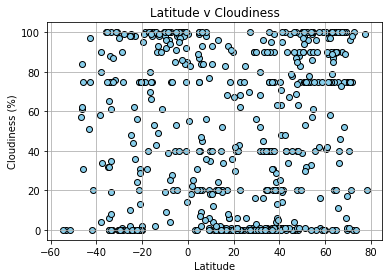

In [11]:
x_axis = cities_df['Lat']
y_axis = cities_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude v Cloudiness')
plt.grid()

##### This plot shows little correlation between cloudiness and latitude. The points tend seem to sit closer to 100% cloudiness or 0% cloudiness while overall the table is pretty scattered.

## Latitude vs. Wind Speed Plot

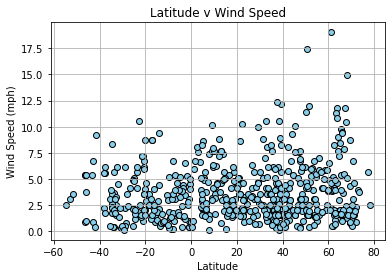

In [12]:
x_axis=cities_df['Lat']
y_axis=cities_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude v Wind Speed')
plt.grid()

plt.show()

###### We can see that many points are located where wind speeds stay below 7.5mph. Though we do see this there is not see a direct correlation between wind speed and latitude.

## Linear Regression

In [31]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y ='  + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r-')
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color='red')
    plt.xlabel('Latitude')
    print(f'The r-squared is: {rvalue}')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8873098042673466


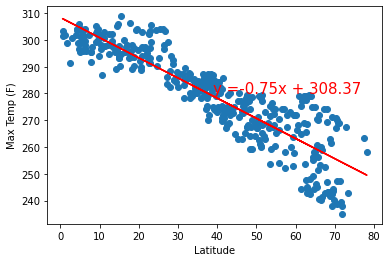

None


In [32]:
n_hemi = cities_df.loc[cities_df["Lat"]>0]
x_values = n_hemi['Lat']
y_values = n_hemi['Max Temp']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5504853415030978


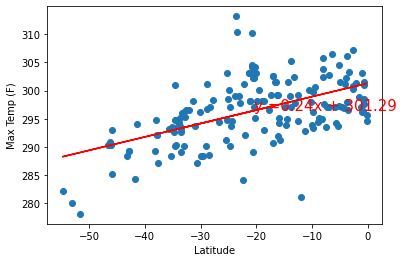

None


In [33]:
s_hemi = cities_df.loc[cities_df["Lat"]<0]
x_values = s_hemi['Lat']
y_values = s_hemi['Max Temp']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.43782261355807583


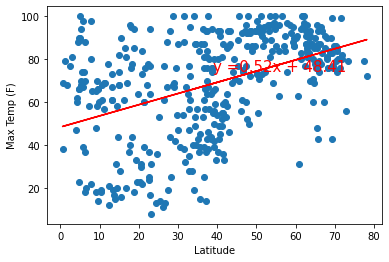

None


In [34]:
n_hemi = cities_df.loc[cities_df["Lat"]>0]
x_values = n_hemi['Lat']
y_values = n_hemi['Humidity']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.43782261355807583


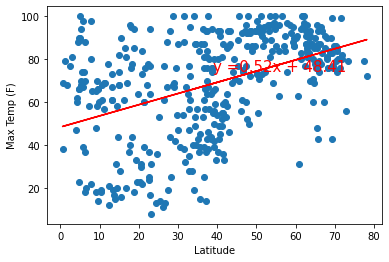

None


In [35]:
s_hemi = cities_df.loc[cities_df["Lat"]>0]
x_values = s_hemi['Lat']
y_values = s_hemi['Humidity']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3378348589278309


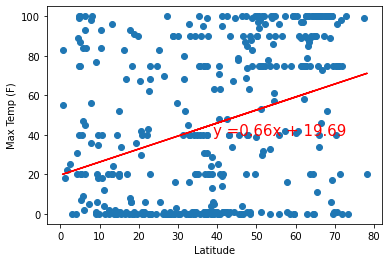

None


In [36]:
n_hemi = cities_df.loc[cities_df["Lat"]>0]
x_values = n_hemi['Lat']
y_values = n_hemi['Cloudiness']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3378348589278309


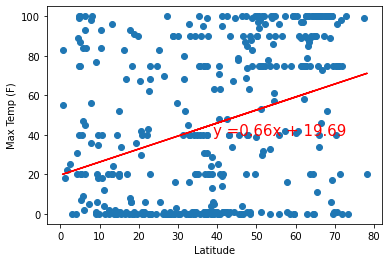

None


In [37]:
s_hemi = cities_df.loc[cities_df["Lat"]>0]
x_values = s_hemi['Lat']
y_values = s_hemi['Cloudiness']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.016042890369572828


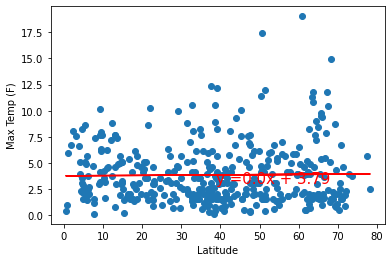

None


In [38]:
n_hemi = cities_df.loc[cities_df["Lat"]>0]
x_values = n_hemi['Lat']
y_values = n_hemi['Wind Speed']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.016042890369572828


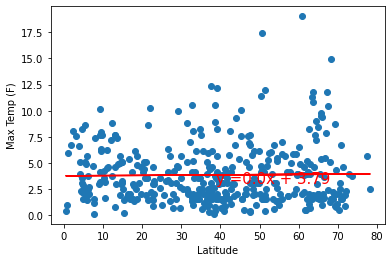

None


In [39]:
s_hemi = cities_df.loc[cities_df["Lat"]>0]
x_values = s_hemi['Lat']
y_values = s_hemi['Wind Speed']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))